# Exercise - Investigate Trending Skills

In [1]:
# Importing Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Extract the dataset for Data Analyst job title.

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3


In [4]:
df_DA_explode = df_DA.explode('job_skills')

df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [5]:
# Create a copy of the exploded dataset and find the duplicated
# data in it (if any) . . . . . . . . . . . . . . . . . . . . . 

df_DA_explode_copy = df_DA_explode.copy()

df_DA_explode_copy[df_DA_explode.duplicated()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,sas,"{'analyst_tools': ['sas', 'spss', 'tableau', '...",10
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,sas,"{'analyst_tools': ['sas', 'word', 'excel'], 'p...",8
169,Data Analyst,Digital Analyst,Anywhere,via LinkedIn,Full-time and Contractor,True,Brazil,2023-12-05 13:10:20,True,False,Brazil,None,NaN,NaN,Acadia,firebase,"{'cloud': ['firebase'], 'databases': ['firebas...",12
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,sas,"{'analyst_tools': ['sas'], 'programming': ['sa...",1
190,Data Analyst,HR Data Analyst - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-04-24 13:00:47,False,False,United States,None,NaN,NaN,Workoo Technologies,sas,"{'analyst_tools': ['sas'], 'programming': ['sa...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785571,Data Analyst,Credits Monitoring and Reporting Analytics Spe...,Türkiye,via Trabajo.org,Full-time,False,Turkey,2023-06-10 06:33:28,False,False,Turkey,None,NaN,NaN,NBS İnsan Kaynakları,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",6
785577,Data Analyst,Audit Data Analytics Co-Op,"Covington, GA",via Trabajo.org,Full-time and Internship,False,Georgia,2023-09-10 06:32:47,False,False,United States,None,NaN,NaN,Fifth Third,sas,"{'analyst_tools': ['sas', 'tableau', 'excel'],...",9
785657,Data Analyst,Digital Analytics,"Lima, Peru","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Peru,2023-09-21 06:24:20,True,False,Peru,None,NaN,NaN,Emprego,firebase,"{'analyst_tools': ['power bi'], 'cloud': ['fir...",9
785666,Data Analyst,Finance Data Analyst S3 Cfo Milton Keynes,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-24 06:33:42,True,False,Colombia,None,NaN,NaN,Santander,sas,"{'analyst_tools': ['sas'], 'programming': ['go...",9


In [6]:
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.
    
        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.
    
    inplace : bool, default ``False``
        Whether to modif

In [7]:
# Creating a pivot table using the exploded dataframe

df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size')

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
2,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
3,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
4,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
5,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
6,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
7,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
8,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
9,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [8]:
# To fill in zero (0) values for NaN

df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [9]:
# To fill in zero (0) values for NaN and Create a new row named 'Total'.

df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', 
                                        aggfunc = 'size', fill_value = 0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [10]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [11]:
# Obtaining the index from the Series created by sorting the Pivot table
# on the basis of the 'Total' row

df_DA_pivot.loc['Total'].sort_values(ascending = False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [12]:
type(df_DA_pivot.loc['Total'].sort_values(ascending = False).index)

pandas.core.indexes.base.Index

In [13]:
type(df_DA_pivot.loc['Total'].sort_values(ascending = False))

pandas.core.series.Series

In [14]:
# Sorting the pivot table based on the values of the 'Total' row

df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

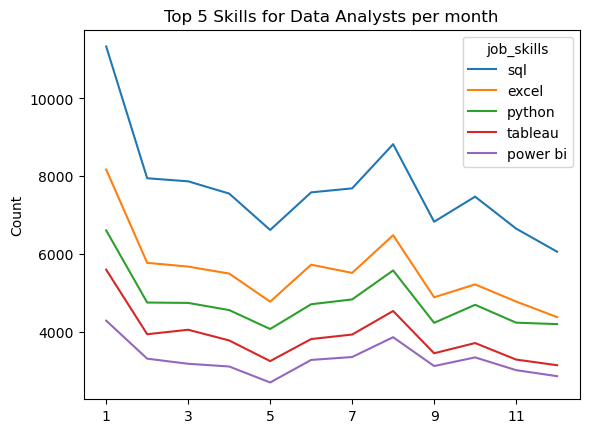

In [16]:
df_DA_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 Skills for Data Analysts per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [17]:
df_DA_pivot = df_DA_pivot.reset_index()

df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x : pd.to_datetime(x, format = '%m').
                                                                           strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')

df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


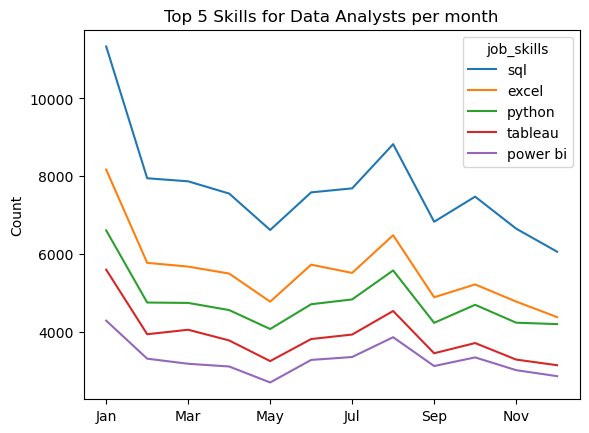

In [18]:
df_DA_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 Skills for Data Analysts per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [19]:
df_DA_pivot_copy = df_DA_pivot.copy()

df_DA_pivot_copy.sum()

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
esquisse         1
suse             1
capacitor        1
chainer          1
msaccess         1
Length: 235, dtype: int64

In [20]:
top5 = (df_DA_pivot_copy
        .sum()
        .head(5)
        .index
        .to_list()
)

In [21]:
df_DA_pivot_copy[top5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


In [23]:
top5_2 = (df_DA_pivot_copy
        .sum()
        .head(5)
        .index
        #.to_list()
)

top5_2

Index(['sql', 'excel', 'python', 'tableau', 'power bi'], dtype='object', name='job_skills')

In [24]:
df_DA_pivot_copy[top5_2]

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118
